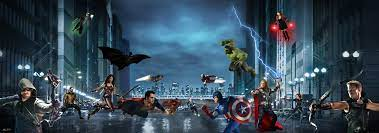

# *****Exploratory Data Analysis*****

# **1. Import the data**

In [1]:
#import the required libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly.subplots import make_subplots

#to prevent Plotly from giving blank visualizations
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the datasets
df_info=pd.read_csv('/kaggle/input/superhero-set/heroes_information.csv')
df_power=pd.read_csv('/kaggle/input/superhero-set/super_hero_powers.csv')

# **2. Data exploration**

# 2.1 Data preview

First, we start by reviewing the first dataset on the information of the heroes or villains of the comics.
"heroes_information.csv"


In [3]:
#view of some data from the dataset
df_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


* Replace "-" with "other", in the columns: "Eye color", "Race", "Hair color" and "Skin color".
* Replace "NaN" with "other" in the column with null values: Publisher.
* It looks like there are a lot of negative values in the height and weight column. We could replaced "-99" by "NA", since these variables cannot take negative values, in order to avoid errors in the result, but we will not, because this would not allow us to make some measurements with these values, how to see who is the tallest. We keep it as a float not object.
* Delete column "Unnamed: 0".

In [4]:
#to know how many records and columns do we have --> 734 records, 11 columns
df_info.shape

(734, 11)

Next, we review the second dataset on the information about the powers of comic book heroes or villains.
"super_hero_powers.csv"

In [5]:
#view of some data from the dataset
df_power.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* In order to be able to measure and compare the powers of heroes or villains, we change the "False" to "0" and the "True" to "1".
* Create a new column that adds up all the powers and reflects your maximum power per character.

In [6]:
#to know how many records and columns do we have --> 667 records, 168 columns
df_power.shape

(667, 168)

# 2.2 Data types

In [7]:
#to know the types of the data on the information about the heroes
df_info.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [8]:
#to know the types of the data on the information about the heroes powers
df_power.dtypes

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

# 2.3 Null Data

In [9]:
#to know the null data of the information about the heroes
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [10]:
df_info.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

We must replace the null data on this dataset

In [11]:
#to know the null data of the information about the heroes powers
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [12]:
df_power.isnull().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

As we can see, we not have any null data on this dataset

# 2.4 Duplicate values

In [13]:
#to know if we have some duplicate values
df_info.duplicated(subset=['name'], keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
729    False
730    False
731    False
732    False
733    False
Length: 734, dtype: bool

In [14]:
#to know if we have some duplicate values
df_power.duplicated(subset=['hero_names'], keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Length: 667, dtype: bool

We not have duplicate values with exactly the same data in all fields

# **3. Transforming the data**

# We must:

**a.** Replace "-" with "other", in the columns: "Eye color", "Race", "Hair color" and "Skin color".

**b.** Replace "NaN" with "other" in the column with null values: Publisher.

**c.** Delete column "Unnamed: 0".

**d.** In order to be able to measure and compare the powers of heroes or villains, we change the "False" to "0" and the "True" to "1".

**e.** Create a new column that adds up all the powers and reflects your maximum power per character.


# Solution:

**a.** Replace "-" with "other", in the columns: "Eye color", "Race", "Hair color" and "Skin color".

In [15]:
df_info.replace(to_replace= '-',value= 'other',inplace= True)
df_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0


**b.** Replace "NaN" with "other" in the column with null values: Publisher.

In [16]:
df_info['Publisher'].fillna('other',inplace= True)
df_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0


**c.** Delete column "Unnamed: 0".

In [17]:
df_info.drop('Unnamed: 0',axis=1,inplace=True)
df_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0


**d.** In order to be able to measure and compare the powers of heroes or villains, we change the "False" to "0" and the "True" to "1".

In [18]:
df_power=df_power*1
df_power.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**e.** Create a new column that adds up all the powers and reflects your maximum power per character.

In [19]:
df_power.loc[:,'Full Power'] = df_power.iloc[:, 1:].sum(axis=1)
df_power.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Full Power
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,10
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
#to organize the characters from highest to lowest number of total power
df_power.sort_values(by=['Full Power'], ascending=(False))

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Full Power
563,Spectre,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,49
18,Amazo,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,44
394,Martian Manhunter,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,35
370,Living Tribunal,1,1,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,35
388,Man of Miracles,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Hawkman,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
284,Heat Wave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
313,JJ Powell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
340,Kathryn Janeway,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
powerful_characters=df_power.sort_values(by=['Full Power'], ascending=(False))
fig=px.bar(powerful_characters,
           title= 'Top 10 powerful characters',
           orientation= 'h',
           y=powerful_characters['hero_names'].head(10), 
           x=powerful_characters['Full Power'].head(10),
           text_auto=True, 
           color=powerful_characters['Full Power'].head(10), color_continuous_scale = 'viridis')
fig.show()

**The 3 most powerful characters:**
                                        
1. Spectre (DC Comics)

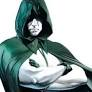

2. Amazo (DC Comics)

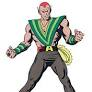

3. Martian Manhunter (DC Comics)

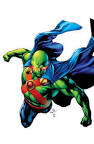


**For this measurement, it was assumed that the more powers the characters have, the more powerful they are.*

# **4. Inspecting ordered datasets and visualization**

# 4.1 How many of them are good, bad or neutral or undefined?

In [22]:
df_info['Alignment']. value_counts()

good       496
bad        207
neutral     24
other        7
Name: Alignment, dtype: int64

In [23]:
#to split the characters by gender 
alignment_male=df_info.loc[df_info['Gender']=='Male']
alignment_femenal=df_info.loc[df_info['Gender']=='Female']

#Alignment by gender chart
fig_male=go.Bar(x=alignment_male['Alignment'].value_counts().index, 
           y=alignment_male['Alignment'].value_counts().values, 
           name='Male')

fig_femenal=go.Bar(x=alignment_femenal['Alignment'].value_counts().index, 
           y=alignment_femenal['Alignment'].value_counts().values, 
           name='Femenal')

layout=go.Layout(title='Alignment by gender', 
                 barmode='group')

fig=go.Figure(data=[fig_male, fig_femenal], layout=layout)

fig.show()

# 4.2 Who is the highest hero?

In [24]:
#if we want to see only the heroes
df_info[df_info['Alignment']=='good']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
6,Adam Monroe,Male,blue,other,Blond,-99.0,NBC - Heroes,other,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,other,good,88.0
...,...,...,...,...,...,...,...,...,...,...
728,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,other,good,83.0
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,other,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0


In [25]:
#we can store the heroes in a new object
heroes=df_info[df_info['Alignment']=='good']
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
6,Adam Monroe,Male,blue,other,Blond,-99.0,NBC - Heroes,other,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,other,good,88.0


In [26]:
#The highest hero
heroes.sort_values(by=['Height'], ascending=False)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0
302,Groot,Male,yellow,Flora Colossus,other,701.0,Marvel Comics,other,good,4.0
718,Wolfsbane,Female,green,other,Auburn,366.0,Marvel Comics,other,good,473.0
575,Sasquatch,Male,red,other,Orange,305.0,Marvel Comics,other,good,900.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
242,Energy,Female,other,other,other,-99.0,HarperCollins,other,good,-99.0
526,Power Man,Male,other,Mutant,other,-99.0,Marvel Comics,other,good,-99.0
232,Dr Manhattan,Male,white,Human / Cosmic,No Hair,-99.0,DC Comics,blue,good,-99.0
227,Donatello,Male,green,Mutant,No Hair,-99.0,IDW Publishing,green,good,-99.0


In [27]:
#top 10 highest heroes
highest_heroes=heroes.sort_values(by=['Height'], ascending=False)
top_10_highest_heroes=highest_heroes.iloc[0:10,:]
top_10_highest_heroes.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0
302,Groot,Male,yellow,Flora Colossus,other,701.0,Marvel Comics,other,good,4.0
718,Wolfsbane,Female,green,other,Auburn,366.0,Marvel Comics,other,good,473.0
575,Sasquatch,Male,red,other,Orange,305.0,Marvel Comics,other,good,900.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
557,Rey,Female,hazel,Human,Brown,297.0,George Lucas,other,good,-99.0
321,Hellboy,Male,gold,Demon,Black,259.0,Dark Horse Comics,other,good,158.0
331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
388,Kilowog,Male,red,Bolovaxian,No Hair,234.0,DC Comics,pink,good,324.0
184,Colossus,Male,silver,Mutant,Black,226.0,Marvel Comics,other,good,225.0


In [28]:
#top 10 highest heroes chart
fig = px.bar(top_10_highest_heroes, 
             x='name', 
             y='Height', 
             title='Top 10 highest heroes', 
             text_auto=True, 
             color='Height', 
             color_continuous_scale = 'turbo')
fig.show()

* Marvel has the 3 highest heroes

1. Fin Fang Foom (Marvel Comics)

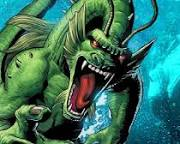

2. Groot (Marvel Comics)

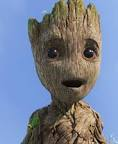

3. Wolfsbane (Marvel Comics)

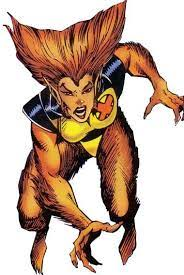

# 4.3 Who is the highest villain?

In [29]:
#if we want to see only the villains
df_info[df_info['Alignment'] == 'bad']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,other,bad,122.0
11,Air-Walker,Male,blue,other,White,188.0,Marvel Comics,other,bad,108.0
12,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,other,bad,90.0
...,...,...,...,...,...,...,...,...,...,...
708,Warp,Male,brown,other,Black,173.0,DC Comics,other,bad,67.0
712,Weapon XI,Male,other,other,other,-99.0,Marvel Comics,other,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,other,bad,-99.0
727,Yellow Claw,Male,blue,other,No Hair,188.0,Marvel Comics,other,bad,95.0


In [30]:
#we can store the villains in a new object
villains=df_info[df_info['Alignment'] == 'bad']
villains.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,other,bad,122.0
11,Air-Walker,Male,blue,other,White,188.0,Marvel Comics,other,bad,108.0
12,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,other,bad,90.0


In [31]:
#the highest villain
villains.sort_values(by='Height', ascending=False)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
463,MODOK,Male,white,Cyborg,Brownn,366.0,Marvel Comics,other,bad,338.0
504,Onslaught,Male,red,Mutant,No Hair,305.0,Marvel Comics,other,bad,405.0
611,Solomon Grundy,Male,black,Zombie,White,279.0,DC Comics,other,bad,437.0
576,Sauron,Male,other,Maiar,other,279.0,J. R. R. Tolkien,other,bad,-99.0
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
...,...,...,...,...,...,...,...,...,...,...
346,Iron Monger,Male,blue,other,No Hair,-99.0,Marvel Comics,other,bad,2.0
605,Siren II,Female,black,other,other,-99.0,DC Comics,other,bad,-99.0
181,Cogliostro,Male,other,other,other,-99.0,Image Comics,other,bad,-99.0
608,Snake-Eyes,Male,other,Animal,other,-99.0,Marvel Comics,other,bad,-99.0


In [32]:
#top 10 highest villains
highest_villains=villains.sort_values(by='Height', ascending=False)
top_10_highest_villains=highest_villains.iloc[0:10,:]
top_10_highest_villains.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
463,MODOK,Male,white,Cyborg,Brownn,366.0,Marvel Comics,other,bad,338.0
504,Onslaught,Male,red,Mutant,No Hair,305.0,Marvel Comics,other,bad,405.0
611,Solomon Grundy,Male,black,Zombie,White,279.0,DC Comics,other,bad,437.0
576,Sauron,Male,other,Maiar,other,279.0,J. R. R. Tolkien,other,bad,-99.0
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
19,Amazo,Male,red,Android,other,257.0,DC Comics,other,bad,173.0
17,Alien,Male,other,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0
386,Killer Croc,Male,red,Metahuman,No Hair,244.0,DC Comics,green,bad,356.0
229,Doomsday,Male,red,Alien,White,244.0,DC Comics,other,bad,412.0
691,Venom III,Male,brown,Symbiote,Brown,229.0,Marvel Comics,other,bad,334.0


In [33]:
#top 10 highest villains chart
fig=px.bar(top_10_highest_villains, 
           x='name', 
           y='Height',
           title='Top 10 highest villains',
           text_auto=True, 
           color='Height', 
           color_continuous_scale = 'turbo')
fig.show()

* Marvel has the 2 highest heroes. The third place is shared by DC Comics and J. R. R. Tolkien.

1. MODOK (Marvel Comics)

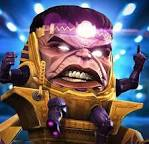

2. Onslaught (Marvel Comics)

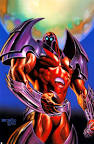

3. Solomon Grundy (DC Comics)

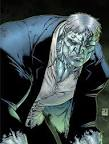

Sauron (J. R. R. Tolkien)

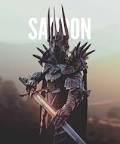

# 4.4 Who is the weighty hero?

In [34]:
#we already created the heroes view
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
6,Adam Monroe,Male,blue,other,Blond,-99.0,NBC - Heroes,other,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,other,good,88.0


In [35]:
#the weighty heroes
heroes.sort_values(by='Weight', ascending=False)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
575,Sasquatch,Male,red,other,Orange,305.0,Marvel Comics,other,good,900.0
331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
718,Wolfsbane,Female,green,other,Auburn,366.0,Marvel Comics,other,good,473.0
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
614,Spawn,Male,brown,Demon,Black,211.0,Image Comics,other,good,405.0
...,...,...,...,...,...,...,...,...,...,...
511,Penance,other,other,other,other,-99.0,Marvel Comics,other,good,-99.0
512,Penance I,Female,other,other,other,-99.0,Marvel Comics,other,good,-99.0
242,Energy,Female,other,other,other,-99.0,HarperCollins,other,good,-99.0
557,Rey,Female,hazel,Human,Brown,297.0,George Lucas,other,good,-99.0


In [36]:
#top 10 weighty heroes
weighty_heroes=heroes.sort_values(by='Weight', ascending=False)
top_10_weighty_heroes=weighty_heroes.iloc[0:10,:]
top_10_weighty_heroes.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
575,Sasquatch,Male,red,other,Orange,305.0,Marvel Comics,other,good,900.0
331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,green,good,630.0
718,Wolfsbane,Female,green,other,Auburn,366.0,Marvel Comics,other,good,473.0
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
614,Spawn,Male,brown,Demon,Black,211.0,Image Comics,other,good,405.0
422,Machine Man,other,red,other,Black,183.0,Marvel Comics,other,good,383.0
388,Kilowog,Male,red,Bolovaxian,No Hair,234.0,DC Comics,pink,good,324.0
591,She-Hulk,Female,green,Human,Green,201.0,Marvel Comics,other,good,315.0
233,Drax the Destroyer,Male,red,Human / Altered,No Hair,193.0,Marvel Comics,green,good,306.0
498,Odin,Male,blue,God / Eternal,White,206.0,Marvel Comics,other,good,293.0


In [37]:
#top 10 weighty heroes chart
fig=px.bar(top_10_weighty_heroes, 
           x='name', 
           y='Weight', 
           title= 'Top 10 weighty heroes', 
           text_auto=True, 
           color='Weight', 
           color_continuous_scale = 'turbo')
fig.show()

* Marvel has the 3 weighty heroes

1. Sasquiatch (Marvel Comics)

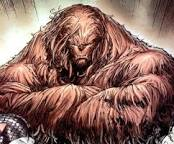

2. Hulk (Marvel Comics)

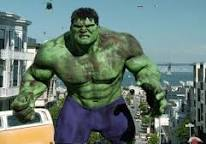

3. Wolfsbane (Marvel Comics)

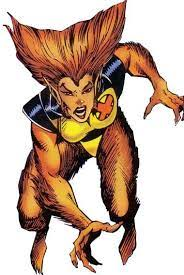

# 4.5 Who is the weighty villain?

In [38]:
#we already created the villains view
villains.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,other,bad,122.0
11,Air-Walker,Male,blue,other,White,188.0,Marvel Comics,other,bad,108.0
12,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,other,bad,90.0


In [39]:
#the weighty villains
villains.sort_values(by='Weight', ascending=False)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
283,Giganta,Female,green,other,Red,62.5,DC Comics,other,bad,630.0
119,Bloodaxe,Female,blue,Human,Brown,218.0,Marvel Comics,other,bad,495.0
657,Thanos,Male,red,Eternal,No Hair,201.0,Marvel Comics,purple,bad,443.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
...,...,...,...,...,...,...,...,...,...,...
436,Match,Male,black,other,Black,-99.0,DC Comics,other,bad,-99.0
605,Siren II,Female,black,other,other,-99.0,DC Comics,other,bad,-99.0
121,Bloodwraith,Male,white,other,No Hair,30.5,Marvel Comics,other,bad,-99.0
261,Fixer,other,red,other,No Hair,-99.0,Marvel Comics,other,bad,-99.0


In [40]:
#top 10 weighty villains
weighty_villains=villains.sort_values(by='Weight', ascending=False)
top_10_weighty_villains=weighty_villains.iloc[0:10,:]
top_10_weighty_villains.head(10)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0
283,Giganta,Female,green,other,Red,62.5,DC Comics,other,bad,630.0
119,Bloodaxe,Female,blue,Human,Brown,218.0,Marvel Comics,other,bad,495.0
657,Thanos,Male,red,Eternal,No Hair,201.0,Marvel Comics,purple,bad,443.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
611,Solomon Grundy,Male,black,Zombie,White,279.0,DC Comics,other,bad,437.0
229,Doomsday,Male,red,Alien,White,244.0,DC Comics,other,bad,412.0
504,Onslaught,Male,red,Mutant,No Hair,305.0,Marvel Comics,other,bad,405.0
217,Destroyer,Male,other,other,other,188.0,Marvel Comics,other,bad,383.0
409,Living Brain,other,yellow,other,other,198.0,Marvel Comics,other,bad,360.0


In [41]:
#top 10 weighty villains chart
fig=px.bar(top_10_weighty_villains, 
           x='name', 
           y='Weight', 
           title='Top 10 weighty villains', 
           text_auto=True, 
           color='Weight', 
           color_continuous_scale = 'turbo')
fig.show()

* DC Comics and Marvel has the 3 weighty villains

1. Darkseid (DC Comics)

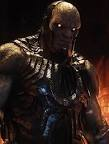

2. Giganta (DC Comics)

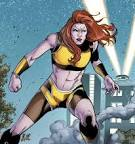

3. Blooddaxe (Marvel Comics)

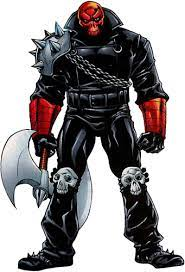

# 4.6 Which is the most frequent super power?

In [42]:
df_power.sum()

hero_names               3-D ManA-BombAbe SapienAbin SurAbominationAbra...
Agility                                                                242
Accelerated Healing                                                    178
Lantern Power Ring                                                      11
Dimensional Awareness                                                   25
                                               ...                        
Molecular Dissipation                                                    1
Vision - Cryo                                                            2
Omnipresent                                                              2
Omniscient                                                               2
Full Power                                                            5874
Length: 169, dtype: object

In [43]:
#create new dataframe to transpose matrix
df_2_power=df_power.T
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,657,658,659,660,661,662,663,664,665,666
hero_names,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Accelerated Healing,0,1,1,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
Lantern Power Ring,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dimensional Awareness,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#create new column to add total superpowers
df_2_power.loc[:,'Total Superpowers']=df_2_power.iloc[:, 1:].sum(axis=1)
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,Total Superpowers
hero_names,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom,A-BombAbe SapienAbin SurAbominationAbraxasAbso...
Agility,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,241
Accelerated Healing,0,1,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,178
Lantern Power Ring,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Dimensional Awareness,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


In [45]:
#delete row 'hero_names' and then change the data type of the column of Total 'Superpowers' from object to int64
df_2_power=df_2_power.drop(['hero_names'], axis=0)
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,Total Superpowers
Agility,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,241
Accelerated Healing,0,1,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,178
Lantern Power Ring,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Dimensional Awareness,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
Cold Resistance,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,47


In [46]:
#to know 'Total Superpower' type of data 
df_2_power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Agility to Full Power
Columns: 668 entries, 0 to Total Superpowers
dtypes: object(668)
memory usage: 878.1+ KB


In [47]:
#to change 'Total Superpower' type of data from 'object to int64'
df_2_power['Total Superpowers']=df_2_power['Total Superpowers'].astype('int64')
df_2_power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Agility to Full Power
Columns: 668 entries, 0 to Total Superpowers
dtypes: int64(1), object(667)
memory usage: 878.1+ KB


In [48]:
#to know the superpower that most has the characters
df_2_power=df_2_power.sort_values(by='Total Superpowers', ascending=False)
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,Total Superpowers
Full Power,4,7,16,1,8,14,11,3,10,1,...,30,17,11,2,3,6,19,8,4,5870
Super Strength,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,359
Stamina,1,1,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,288
Durability,0,1,1,0,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,257
Super Speed,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,248


In [49]:
#delete row 'Full Power'
df_2_power=df_2_power.drop(['Full Power'], axis=0)
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,Total Superpowers
Super Strength,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,359
Stamina,1,1,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,288
Durability,0,1,1,0,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,257
Super Speed,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,248
Agility,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,241


In [50]:
#adjust column of super powers to be able to graph it
df_2_power['Superpower']=df_2_power.index
df_2_power.head()

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,Total Superpowers,Superpower
Super Strength,1,1,1,0,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,359,Super Strength
Stamina,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,288,Stamina
Durability,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,257,Durability
Super Speed,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,248,Super Speed
Agility,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,241,Agility


In [51]:
#top 20 most frequent superpowers
top_20_powers=df_2_power.iloc[0:20,:]
top_20_powers.head(20)

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,Total Superpowers,Superpower
Super Strength,1,1,1,0,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,359,Super Strength
Stamina,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,288,Stamina
Durability,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,257,Durability
Super Speed,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,248,Super Speed
Agility,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,241,Agility
Flight,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,212,Flight
Accelerated Healing,0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,178,Accelerated Healing
Reflexes,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,164,Reflexes
Intelligence,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,158,Intelligence
Energy Blasts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,147,Energy Blasts


In [52]:
fig=px.bar(top_20_powers, 
           x='Superpower', 
           y='Total Superpowers', 
           title= 'Top 20 most frequent superpowers', 
           text_auto=True, 
           color='Total Superpowers', 
           color_continuous_scale = 'inferno')
fig.show()

# 4.7 What are the most unique powers?

In [53]:
#least frequent super powers
list(df_2_power['Superpower'].loc[df_2_power['Total Superpowers']<=1])

['Hyperkinesis',
 'Speed Force',
 'Spatial Awareness',
 'Biokinesis',
 'Molecular Dissipation',
 'Phoenix Force',
 'Intuitive aptitude',
 'Electrical Transport',
 'Anti-Gravity',
 'Hair Manipulation',
 'Thirstokinesis',
 'Banish',
 'Omnitrix',
 'Changing Armor']

# 4.8 What is the most frequent race?

In [54]:
df_info.value_counts('Race')

Race
other            304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
                ... 
Korugaran          1
Clone              1
Luphomoid          1
Maiar              1
Icthyo Sapien      1
Length: 62, dtype: int64

In [55]:
#to avoid 'others' in the chart and show only the top 5 most frequent race
heroes_race= heroes.loc[heroes['Race']!='other']['Race'].value_counts()
top_5_heroes_race=heroes_race.head(5)

villains_race= villains.loc[villains['Race']!='other']['Race'].value_counts()
top_5_villians_race= villains_race.head(5)

In [56]:
#heroes and villains by race chart
fig_top_5_heros_race=go.Bar(x=top_5_heroes_race.index, 
                   y=top_5_heroes_race.values, 
                   name='Heroes')

fig_top_5_villains_race=go.Bar(x=top_5_villians_race.index, 
                     y=top_5_villians_race.values, 
                     name='Villains')

layout=go.Layout(title='Top 5 heroes and villains by race', 
                 barmode='group')

fig=go.Figure(data=[fig_top_5_heros_race, fig_top_5_villains_race], layout=layout)
fig.show()

In [57]:
#subplot donut heroes and villains by race
fig=make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=top_5_heroes_race.index, values=top_5_heroes_race, name="Heroes"),
              1, 1)
fig.add_trace(go.Pie(labels=top_5_villians_race.index, values=top_5_villians_race, name="Villiains"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Top 5 Heroes and Villains by race",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Heroes', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Villains', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

* The human race is the predominant betewen heroes and villains
* There are more mutants and humans/radiation on the heroes side, while the villains have more cyborgs and androids.

# **5. Relation analysis**
# 5.1 Exist any relation between eye color and alignment of the characters?

In [58]:
fig = px.density_heatmap(df_info, 
                         x='Eye color', 
                         y='Alignment', 
                         template='plotly', 
                         title='Alignment of the character by eye color', 
                         text_auto=True)
fig.show()

* Most of the heroes have blue eyes
* Heroes have the most diverse eye color, between blue, green and brown. While the color of the villains' eyes is centered more between blue and brown.

# 5.2 Exist any relation between hair color and alignment of the characters?

In [59]:
fig=px.density_heatmap(df_info, 
                       x='Hair color', 
                       y='Alignment', 
                       title='Alignment of the character by hair color', 
                       text_auto=True, 
                       template="plotly")
fig.show()

* Most of the heroes have black hair.
* Heroes have the most diverse hair color, between black, blond and brown. While the color of the villains' hair is centered more between no hair and black.
* It is interesting that there is a considerable part of the heroes that have red hair

# 5.3 Exist any relation between skin color and alignment of the characters?

In [60]:
fig=px.density_heatmap(df_info, 
                       x='Skin color', 
                       y='Alignment', 
                       template='plotly', 
                       text_auto=True, 
                       title='Alignment of the character by skin color')
fig.show()

* There is no enough information to determine any relation between the alignment of the character and their skin color

# **6. Additional analysis**

# 6.1 Character body mass index

In [61]:
df_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0


In [62]:
#create colum 'BMI' and define BMI formula
bmi=(df_info['Weight']/(df_info['Height']**2))*703

df_info.loc[:,'BMI']=bmi
df_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,BMI
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,other,good,441.0,7.523187
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1.252570
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,1.848649
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,other,bad,441.0,7.523187
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,other,bad,-99.0,-7.101010


# 6.1.1 Body mass index based on height

In [63]:
fig = px.scatter(df_info, x=df_info['Height'], y=df_info['BMI'], color='Gender')
fig.show()

# 6.1.2 Body mass index based on weight

In [64]:
fig = px.scatter(df_info, x=df_info['Weight'], y=df_info['BMI'], color='Gender')
fig.show()

**For this measurement it was assumed that the unit of measurement for the weight is given in pounds and the Height in inches.*

# 6.2 Correlation between variables
Correlation heatmap (Pearson method)

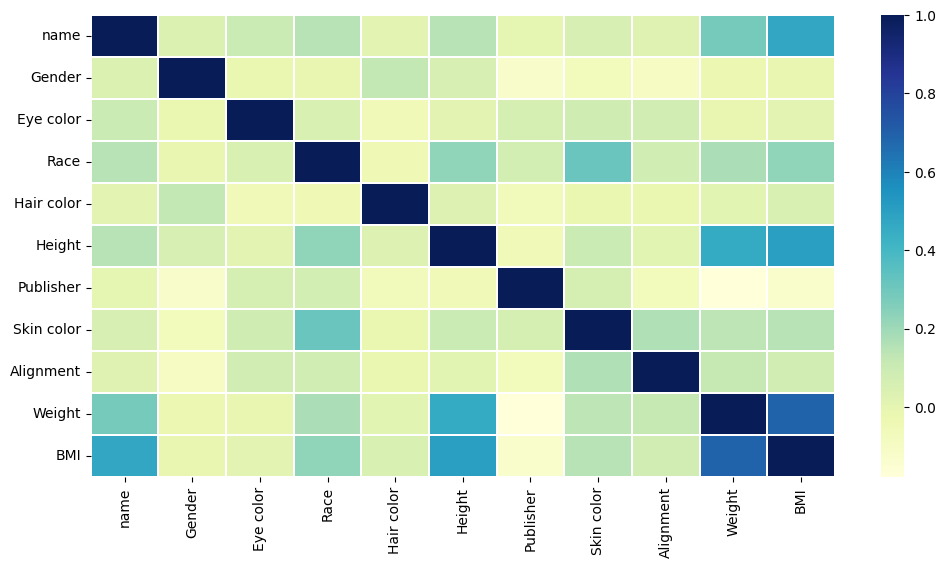

In [65]:
plt.figure(figsize=(12, 6))
corr = df_info.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

*I'm still learning, any suggestions or comments to improve will be appreciated! If you liked it and have any recommendations for other datasets I should look at, let me know in the comments ! Thanks for the support! :)*